# Tugas 2 – Praproses Data

## Praktikum Data Mining Terapan (KOM2622)

**Nama**   : Yasha Gozwan Shuhada  
**Program**: Magister Ilmu Komputer SSMI IPB  
**Semester**: Genap 2025/2026

## 1. Pendahuluan

Praproses data merupakan tahapan penting dalam data mining untuk memastikan kualitas data sebelum dilakukan analisis atau pemodelan. Dataset yang digunakan pada tugas ini adalah **Agri-food CO₂ Emission Dataset**, yang berisi informasi emisi karbon dari sektor pertanian dan pangan di berbagai negara.

Tujuan dari tugas ini adalah melakukan tahapan praproses data meliputi penanganan missing value, feature scaling, normalisasi, feature encoding, dan penanganan outlier.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset

In [11]:
df = pd.read_csv("../datasets/Agrofood_co2_emission.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


## 3. Eksplorasi Data Awal

Tahap ini dilakukan untuk memahami struktur dataset, tipe data, serta kondisi awal data sebelum dilakukan praproses.

In [12]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   str    
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail                    

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


## 4. Penanganan Missing Value

Pada tahap ini dilakukan identifikasi dan penanganan nilai yang hilang (missing value) pada dataset.

In [13]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


>Berdasarkan hasil analisis, beberapa atribut memiliki missing value dengan persentase yang relatif kecil, sehingga dilakukan imputasi menggunakan nilai mean atau median sesuai dengan distribusi data.


## 5. Feature Scaling

Feature scaling dilakukan untuk menyamakan skala data numerik agar tidak terjadi dominasi fitur tertentu.

In [14]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])

/var/folders/xx/zwz4dj4j3jzb_g3c5pywl6cdqqzlwj/T/ipykernel_34394/3236355203.py:4: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_columns = df.select_dtypes(include=["object"]).columns


## 6. Normalization

Normalisasi dilakukan untuk mengubah rentang nilai fitur menjadi antara 0 dan 1.


In [20]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

df_normalized = df.copy()
df_normalized[numerical_columns] = minmax.fit_transform(df[numerical_columns])

df_normalized[numerical_columns].head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,0.000000,0.000128,0.000001,0.006139,0.004160,0.0,0.000717,0.000929,0.820811,0.0,...,0.004515,0.0,0.0,NaN,0.010727,0.002876,0.007192,0.007495,0.112370,0.392447
1,0.033333,0.000128,0.000001,0.006255,0.004112,0.0,0.000712,0.000901,0.820811,0.0,...,0.004843,0.0,0.0,NaN,0.011366,0.003063,0.007225,0.007531,0.112406,0.288807
2,0.066667,0.000128,0.000001,0.005868,0.004160,0.0,0.000712,0.000785,0.820811,0.0,...,0.004939,0.0,0.0,NaN,0.012216,0.003310,0.008107,0.008451,0.112415,0.232463
3,0.100000,0.000128,0.000001,0.006892,0.004160,0.0,0.000712,0.000800,0.820811,0.0,...,0.004984,0.0,0.0,NaN,0.013174,0.003588,0.009418,0.009813,0.112419,0.305142
4,0.133333,0.000128,0.000001,0.007227,0.004279,0.0,0.000712,0.000795,0.820811,0.0,...,0.005202,0.0,0.0,NaN,0.014099,0.003861,0.010400,0.010825,0.112457,0.359492


## 7. Feature Encoding

Atribut kategorikal perlu diubah menjadi bentuk numerik agar dapat diproses lebih lanjut.


In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)

## 8. Penanganan Outlier

Outlier diidentifikasi menggunakan metode Interquartile Range (IQR).


In [19]:
Q1 = df_encoded[numerical_columns].quantile(0.25)
Q3 = df_encoded[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (df_encoded[numerical_columns] < (Q1 - 1.5 * IQR)) | \
                    (df_encoded[numerical_columns] > (Q3 + 1.5 * IQR))

outlier_count = outlier_condition.sum()
outlier_count

Year                                  0
Savanna fires                      1429
Forest fires                       1388
Crop Residues                       891
Rice Cultivation                    923
Drained organic soils (CO2)        1361
Pesticides Manufacturing            946
Food Transport                      890
Forestland                         1277
Net Forest conversion              1085
Food Household Consumption         1079
Food Retail                         871
On-farm Electricity Use             917
Food Packaging                     1358
Agrifood Systems Waste Disposal    1028
Food Processing                     851
Fertilizers Manufacturing           778
IPPU                                955
Manure applied to Soils             796
Manure left on Pasture              911
Manure Management                   850
Fires in organic soils              309
Fires in humid tropical forests    1555
On-farm energy use                  874
Rural population                    758


In [21]:
df_no_outlier = df_encoded.copy()

for col in numerical_columns:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]
    df_no_outlier[col] = np.clip(df_no_outlier[col], lower, upper)


## 9. Visualisasi Data

Visualisasi digunakan untuk mendukung analisis praproses data.

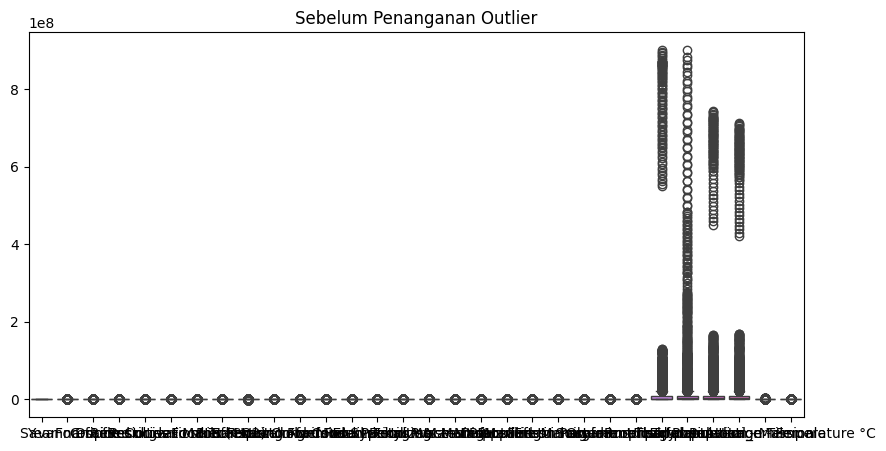

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[numerical_columns])
plt.title("Sebelum Penanganan Outlier")
plt.show()

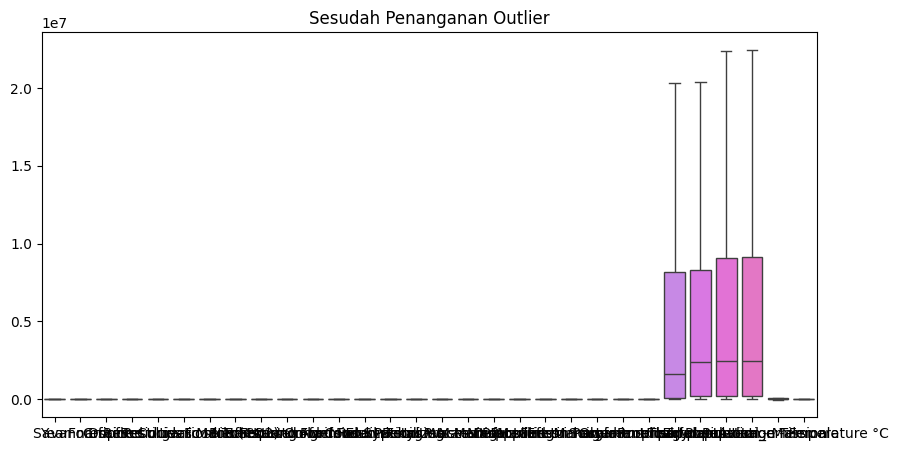

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_no_outlier[numerical_columns])
plt.title("Sesudah Penanganan Outlier")
plt.show()

In [24]:
df_no_outlier.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6472.000000,...,6037.000000,6965.0,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000,6965.000000
mean,2005.124910,71.495765,41.513127,263.597212,1063.925045,438.005608,74.690006,776.246821,-1695.731156,2955.497360,...,766.578631,0.0,6.013574,731.835925,5.154617e+06,5.763202e+06,6.079264e+06,6.116931e+06,25124.886788,0.870471
std,8.894665,112.795646,65.605626,333.467547,1223.192384,687.913686,101.887187,1047.677450,2913.183915,4568.507478,...,980.657815,0.0,10.085303,1027.464985,6.865055e+06,7.213899e+06,7.699925e+06,7.739313e+06,28766.616567,0.535379
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-7120.875000,0.000000,...,0.432900,0.0,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-39656.485651,-0.531792
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000,...,37.632100,0.0,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5221.243741,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,44.440000,...,269.856300,0.0,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,12147.654319,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4701.745900,...,1126.818900,0.0,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,35139.730002,1.206750
max,2020.000000,277.703500,162.376937,927.592650,3569.708800,1726.022000,281.813718,2975.564350,4272.525000,11754.364750,...,2760.599100,0.0,23.944688,2822.375650,2.029738e+07,2.036673e+07,2.238782e+07,2.246964e+07,80017.459394,2.249875


## 10. Kesimpulan

Berdasarkan tahapan praproses yang telah dilakukan, dataset Agri-food CO₂ Emission telah dibersihkan dari missing value, dinormalisasi, dilakukan encoding pada fitur kategorikal, serta ditangani outlier-nya. Dataset ini telah siap digunakan untuk analisis data mining lebih lanjut.